" The goal of this project is to predict wether user will have their loan request accepted based on features like marital status, education ect.
Three models will be build where each uses a classification algorithms (knn and logistic regression and SVC) to predict loan status. 

#To implement, we will have to go through several parts

#part 1:importing all required libraries

In [ ]:
import pandas as pd 
import numpy as np 
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing


%matplotlib inline 

In [ ]:
#knn:
from sklearn.metrics import confusion_matrix as cf 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split as train
#//from scipy import stats
#logiaitc regresion:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
#//import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score
#svc:
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

#part 2:data importing , inspecting and cleanising

In [ ]:
data=pd.read_csv("/content/Loan Prediction.csv")

#inspect colums to identity costing 

In [ ]:
data.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Check for duplicated Data

In [ ]:
sum(data.duplicated())

0

No Duplicated data therefore no any modifications

loan ID is unique key to each user that does not coerelate to loan approval. So it will be dropped from the data frame

In [ ]:
data.drop('Loan_ID',axis=1,inplace=True)

#check for nulls in data

"""null values will be handeled by deleting rows with null values for for numeric data filling with mean, ordinal datafilling with median
maximum null values that are removed should not exceed 10% of maximum data set for for each colume with its null values removed a track is
kept of percentage of data removed"""




In [ ]:
data.corr()
#check for corr, and see which null data can be dropped and which can be filled with median

<ipython-input-199-49daca3e2bd3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [ ]:
print(data.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
#in the model maximum 10% of data with null values will be removed to not waste data. so a track is kept of total no of rows and percentage removed

In [ ]:
original_size=len(data.index)

In [ ]:
data.dropna(subset=['Married'],inplace=True) #we dropped Married since only 3, and it won't affect the data
print(data.isnull().sum())

Gender               13
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
print("current no of rows:" , len(data.index))
print("percentage of data removed : ", 100-100*len(data.index)/original_size)
#This is used to check % of data removed, as mentioned earlier, maximum 10% can be removed

current no of rows: 611
percentage of data removed :  0.4885993485342084


In [ ]:
data.dropna(subset=['Self_Employed'],inplace=True) #after checking self_employed, it doesn't affect much in the corr 
# therefore we will drop the nulls

In [ ]:
print("current no of rows:" , len(data.index))
print("percentage of data removed : ", (100-100*len(data.index)/original_size))

current no of rows: 579
percentage of data removed :  5.700325732899017


since only 5.7% was removed which is less than 10, we will drop more data

In [ ]:
print(data.isnull().sum())

Gender               13
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     13
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
data.dropna(subset=['Gender'],inplace=True) # gender is low in amount of data, and doesn't affect much in corr so its nulls is dropped as well

In [ ]:
print("current no of rows:" , len(data.index))
print("percentage of data removed : ", 100-100*len(data.index)/original_size)

current no of rows: 566
percentage of data removed :  7.817589576547235


only 7.82% is removed so we are still safe 👍

In [ ]:
print(data.isnull().sum())

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True) #filling LoanAmount with median since it's numerical data

In [ ]:
print(data.isnull().sum())

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)
##filling Loan_Amount_Term with median since it's numerical data

In [ ]:
print(data.isnull().sum())

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

"""by inspecting loan amount term it is found that data has low variablility sugesting no outliers need to be removed. 
loan amount term is time period at which loan requested to be returned so it makes sense that bank sets specific ranges of periods so data 
can be considered categorical"""

# Part3: removing outliers from data

In [ ]:
def remove_outliers(x):
   Q1=x.quantile(0.25)
   Q3=x.quantile(0.75)
   IQR=Q3-Q1
   x=np.where(x> Q1 - 1.5*IQR,x,Q1 - 1.5*IQR)
   x=np.where(x< Q3 +1.5*IQR,x,Q3 + 1.5*IQR)
   sns.boxplot(data=x,palette='rainbow',orient='h')
   return 

<Axes: >

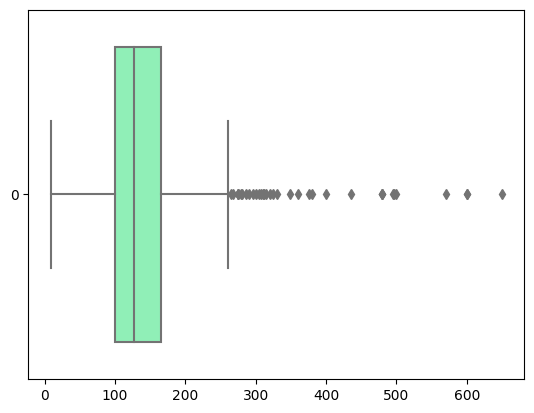

In [ ]:
sns.boxplot(data=data['LoanAmount'],palette='rainbow',orient='h')

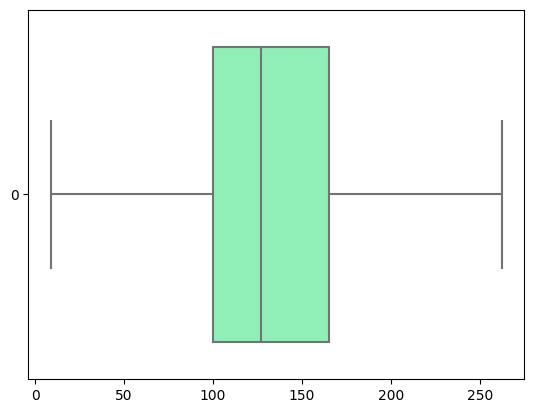

In [ ]:
remove_outliers(data['LoanAmount']) #loanAmount contains many outliers, so we dropped them to increase accuracy

<Axes: >

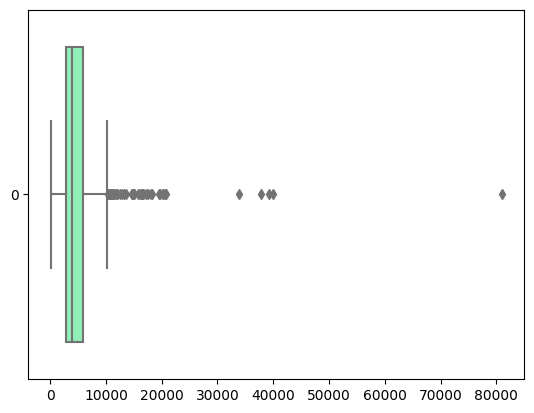

In [ ]:
sns.boxplot(data=data['ApplicantIncome'],palette='rainbow',orient='h')

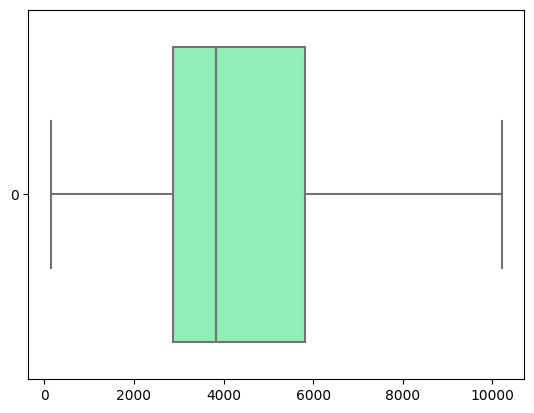

In [ ]:
remove_outliers(data['ApplicantIncome']) #ApplicantIncome contains many outliers, so we dropped them to increase accuracy

<Axes: >

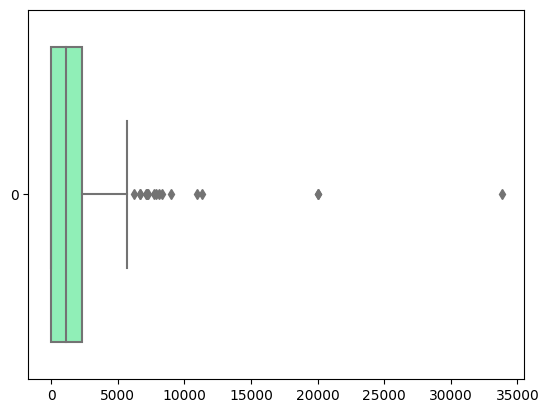

In [ ]:
sns.boxplot(data=data['CoapplicantIncome'],palette='rainbow',orient='h')

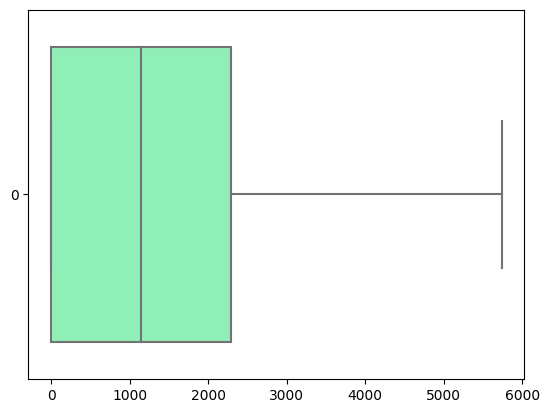

In [ ]:
remove_outliers(data['CoapplicantIncome']) #CoapplicantIncome contains many outliers, so we dropped them to increase accuracy

# Part 5: Feature encoding and replacing data

In [ ]:
def replace(x):
  if(x=="Yes" or x=="Y" or x=="Male" or x==1 or x=="Graduate"):
    x=1
  else :
    x=0
  return x

In [ ]:
data['Gender']=data['Gender'].apply(replace) #Feature encoding for gender

In [ ]:
data['Married']=data['Married'].apply(replace) #Feature encoding for Married

In [ ]:
data['Self_Employed']=data['Self_Employed'].apply(replace) #Feature encoding for Self_Employed

In [ ]:
data['Loan_Status']=data['Loan_Status'].apply(replace) #Feature encoding for Loan_status

In [ ]:
data['Education']=data['Education'].apply(replace) #Feature encoding for education

In [ ]:
data.head(10)
#check data after feature encoding

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,127.0,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,Urban,1
7,1,1,3+,1,0,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,Urban,1
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,Semiurban,0


#Part 6: Extra data cleansing and some modifications

handling nulls of dependents column

In [ ]:
dep= data['Dependents'].dropna()

In [ ]:
def replace_dependents(x):
  
   if(x == "3+"):
     x=3
   else:
    x=int(x)
   return x

In [ ]:
dep=dep.apply(replace_dependents)

In [ ]:
dep_median=dep.median()

In [ ]:
data['Dependents'].fillna(dep_median,inplace=True)

In [ ]:
data['Dependents']=data['Dependents'].apply(replace_dependents)

In [ ]:
data.corr()


<ipython-input-236-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.000000,0.368928,0.198689,-0.056105,-0.010703,0.045795,0.162719,0.110023,-0.088522,0.025554,0.025719
Married,0.368928,1.000000,0.357568,-0.017614,0.000114,0.036778,0.120572,0.160268,-0.110173,0.022743,0.098854
Dependents,0.198689,0.357568,1.000000,-0.061243,0.056002,0.115880,-0.022654,0.141730,-0.102720,-0.026212,0.012869
Education,-0.056105,-0.017614,-0.061243,1.000000,0.006165,0.145049,0.069201,0.167512,0.088771,0.081245,0.091761
Self_Employed,-0.010703,0.000114,0.056002,0.006165,1.000000,0.163964,-0.023071,0.124057,-0.028518,-0.004487,-0.016227
ApplicantIncome,0.045795,0.036778,0.115880,0.145049,0.163964,1.000000,-0.103295,0.509793,0.002468,-0.038277,-0.037906
CoapplicantIncome,0.162719,0.120572,-0.022654,0.069201,-0.023071,-0.103295,1.000000,0.194229,-0.010941,0.001980,-0.033831
LoanAmount,0.110023,0.160268,0.141730,0.167512,0.124057,0.509793,0.194229,1.000000,0.072947,-0.024666,-0.050196
Loan_Amount_Term,-0.088522,-0.110173,-0.102720,0.088771,-0.028518,0.002468,-0.010941,0.072947,1.000000,0.002543,-0.018266
Credit_History,0.025554,0.022743,-0.026212,0.081245,-0.004487,-0.038277,0.001980,-0.024666,0.002543,1.000000,0.557344


In [ ]:
#Since dependents doesn't affect much on data due to corr, we will drop it
data.drop(['Dependents'],axis=1,inplace=True)

In [ ]:
#from correlation plot it is seen that applicant income is stringly corelated with loan amount. Loan has greater impact on data so applicant income will be dropped
data.drop(['ApplicantIncome'],axis=1,inplace=True)

In [ ]:
print(data.isnull().sum())

Gender                0
Married               0
Education             0
Self_Employed         0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64


fill credit history with median

In [ ]:
data['Credit_History'].fillna(data['Credit_History'].median(),inplace=True)

In [ ]:
def replace_prop(x):
  if(x=="Urban"):
    x=0
  elif(x=="Semiurban"):
    x=1
  else:
    x=2

  return x

In [ ]:
data['Property_Area']=data['Property_Area'].apply(replace_prop)

In [ ]:
data.head(10)

,Gender,Married,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,0.0,127.0,360.0,1.0,0,1
1,1,1,1,0,1508.0,128.0,360.0,1.0,2,0
2,1,1,1,1,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,2358.0,120.0,360.0,1.0,0,1
4,1,0,1,0,0.0,141.0,360.0,1.0,0,1
5,1,1,1,1,4196.0,267.0,360.0,1.0,0,1
6,1,1,0,0,1516.0,95.0,360.0,1.0,0,1
7,1,1,1,0,2504.0,158.0,360.0,0.0,1,0
8,1,1,1,0,1526.0,168.0,360.0,1.0,0,1
9,1,1,1,0,10968.0,349.0,360.0,1.0,1,0


# Part 7: Feature Scaling

In [ ]:
print(data.isnull().sum())

Gender               0
Married              0
Education            0
Self_Employed        0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().fit(data[['LoanAmount', 'CoapplicantIncome','Loan_Amount_Term']])
#"""'ApplicantIncome',"""


In [ ]:

data[['LoanAmount','CoapplicantIncome','Loan_Amount_Term']]= scaler.transform(data[['LoanAmount','CoapplicantIncome','Loan_Amount_Term']])
data
#,'ApplicantIncome'

,Gender,Married,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,-0.630391,-0.209605,0.268718,1.0,0,1
1,1,1,1,0,-0.028401,-0.197169,0.268718,1.0,2,0
2,1,1,1,1,-0.630391,-0.968182,0.268718,1.0,0,1
3,1,1,0,0,0.310916,-0.296655,0.268718,1.0,0,1
4,1,0,1,0,-0.630391,-0.035505,0.268718,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,-0.630391,-0.906004,0.268718,1.0,2,1
610,1,1,1,0,-0.630391,-1.291510,-2.513493,1.0,2,1
611,1,1,1,0,-0.534583,1.357292,0.268718,1.0,0,1
612,1,1,1,0,-0.630391,0.536536,0.268718,1.0,0,1


#Part 8: **VISUALIZATION**




<Axes: xlabel='Gender', ylabel='count'>

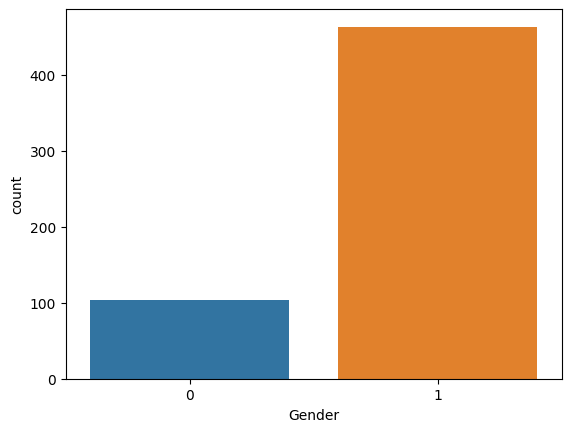

In [ ]:
sns.countplot(x= 'Gender',data=data)
#shows number of sex , 0 is female and 1 is male
# Since male is way greater than women, then we ought to expect unbalanced data, for example if we compare how much loaned is accepted for male and female we will
# find that females may have similar percentage like male due to them being lower on size

<Axes: xlabel='Gender', ylabel='Loan_Status'>

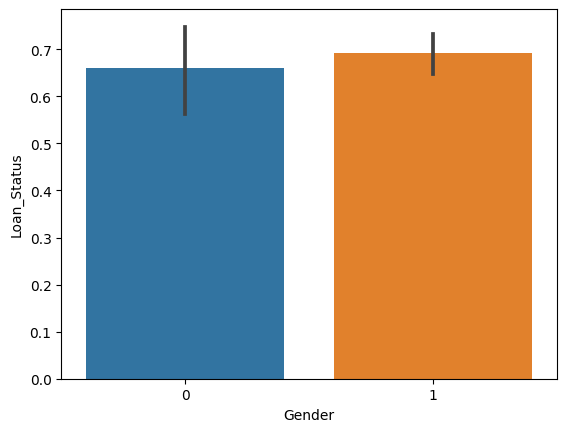

In [ ]:
sns.barplot(x=data['Gender'],y= data['Loan_Status'],data=data)
#compares Gender and loan_status to show that male and female have similar %  because female are lower in size 

<Axes: xlabel='Married', ylabel='count'>

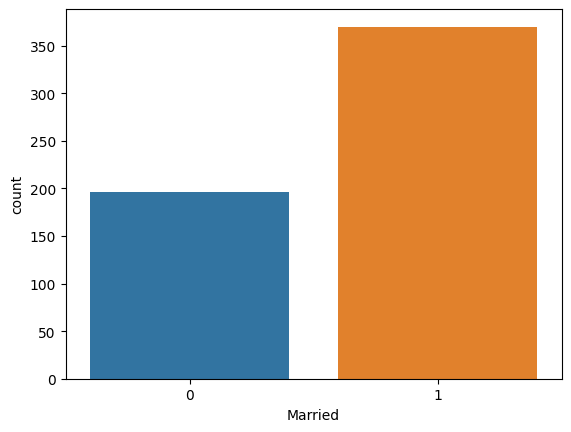

In [ ]:
sns.countplot(x= 'Married',data=data)

<Axes: xlabel='Married', ylabel='Loan_Status'>

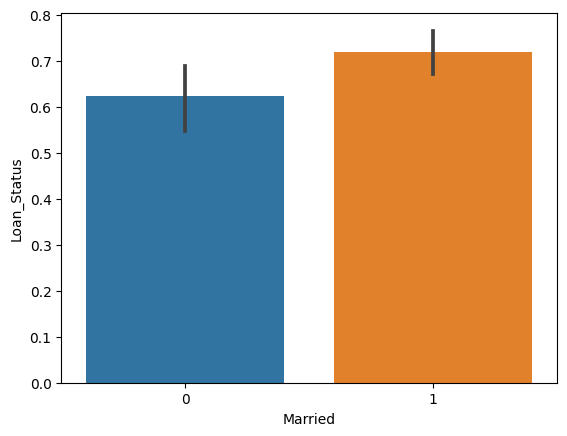

In [ ]:
sns.barplot(x=data['Married'],y= data['Loan_Status'],data=data)
#Juding by this data, loan provided doesn't favour either side

<Axes: xlabel='Education', ylabel='Loan_Status'>

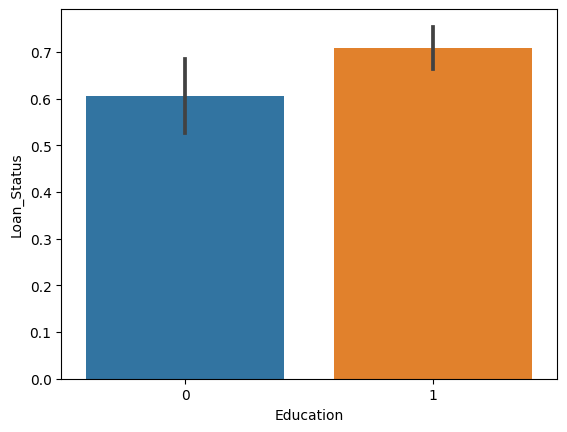

In [ ]:
sns.barplot(x=data['Education'],y= data['Loan_Status'],data=data)
#We can say that loan_status doesn't depend much on Education since similar %

<Axes: xlabel='Self_Employed', ylabel='Loan_Status'>

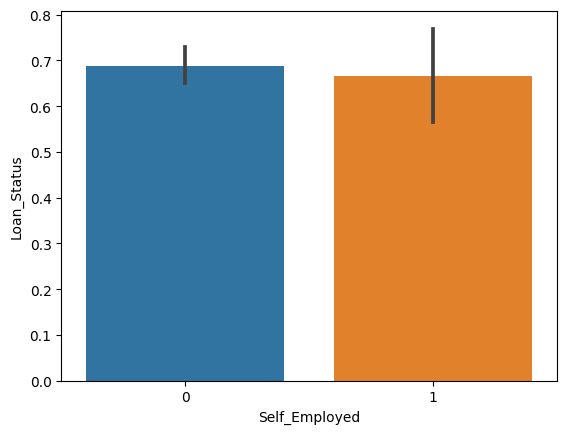

In [ ]:
sns.barplot(x=data['Self_Employed'],y= data['Loan_Status'],data=data)
#We can say that loan_status doesn't depend much on Self_Employed as well since similar %

In [ ]:
#sns.relplot(data=data, x= data['ApplicantIncome'], y=data['LoanAmount'], hue=data['Loan_Status'])
#Checks how much loan is given depending on the income, and whether the loan is accepted or not, 0 = false, 1 = True
#data is nearly balanced which means, loan_status doesn't necesarrly favour a certain income

KeyError: ignored

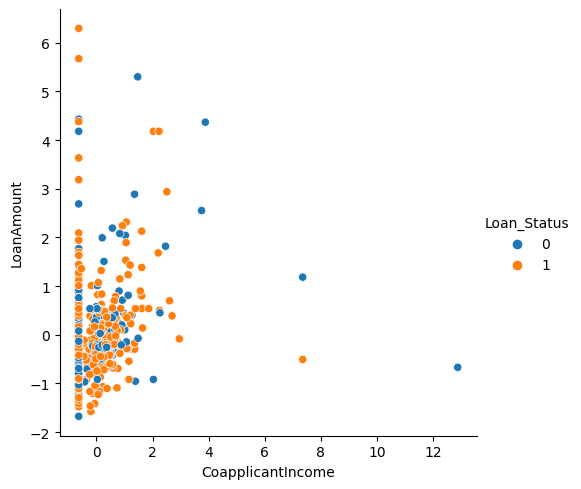

In [ ]:
sns.relplot(data=data, x= data['CoapplicantIncome'], y=data['LoanAmount'], hue=data['Loan_Status'])
#Checks how much loan is given depending on the Coapplicant income, and whether the loan is accepted or not, 0 = false, 1 = True
#data is nearly balanced which means, loan_status doesn't necesarrly favour a certain Coapplicant income

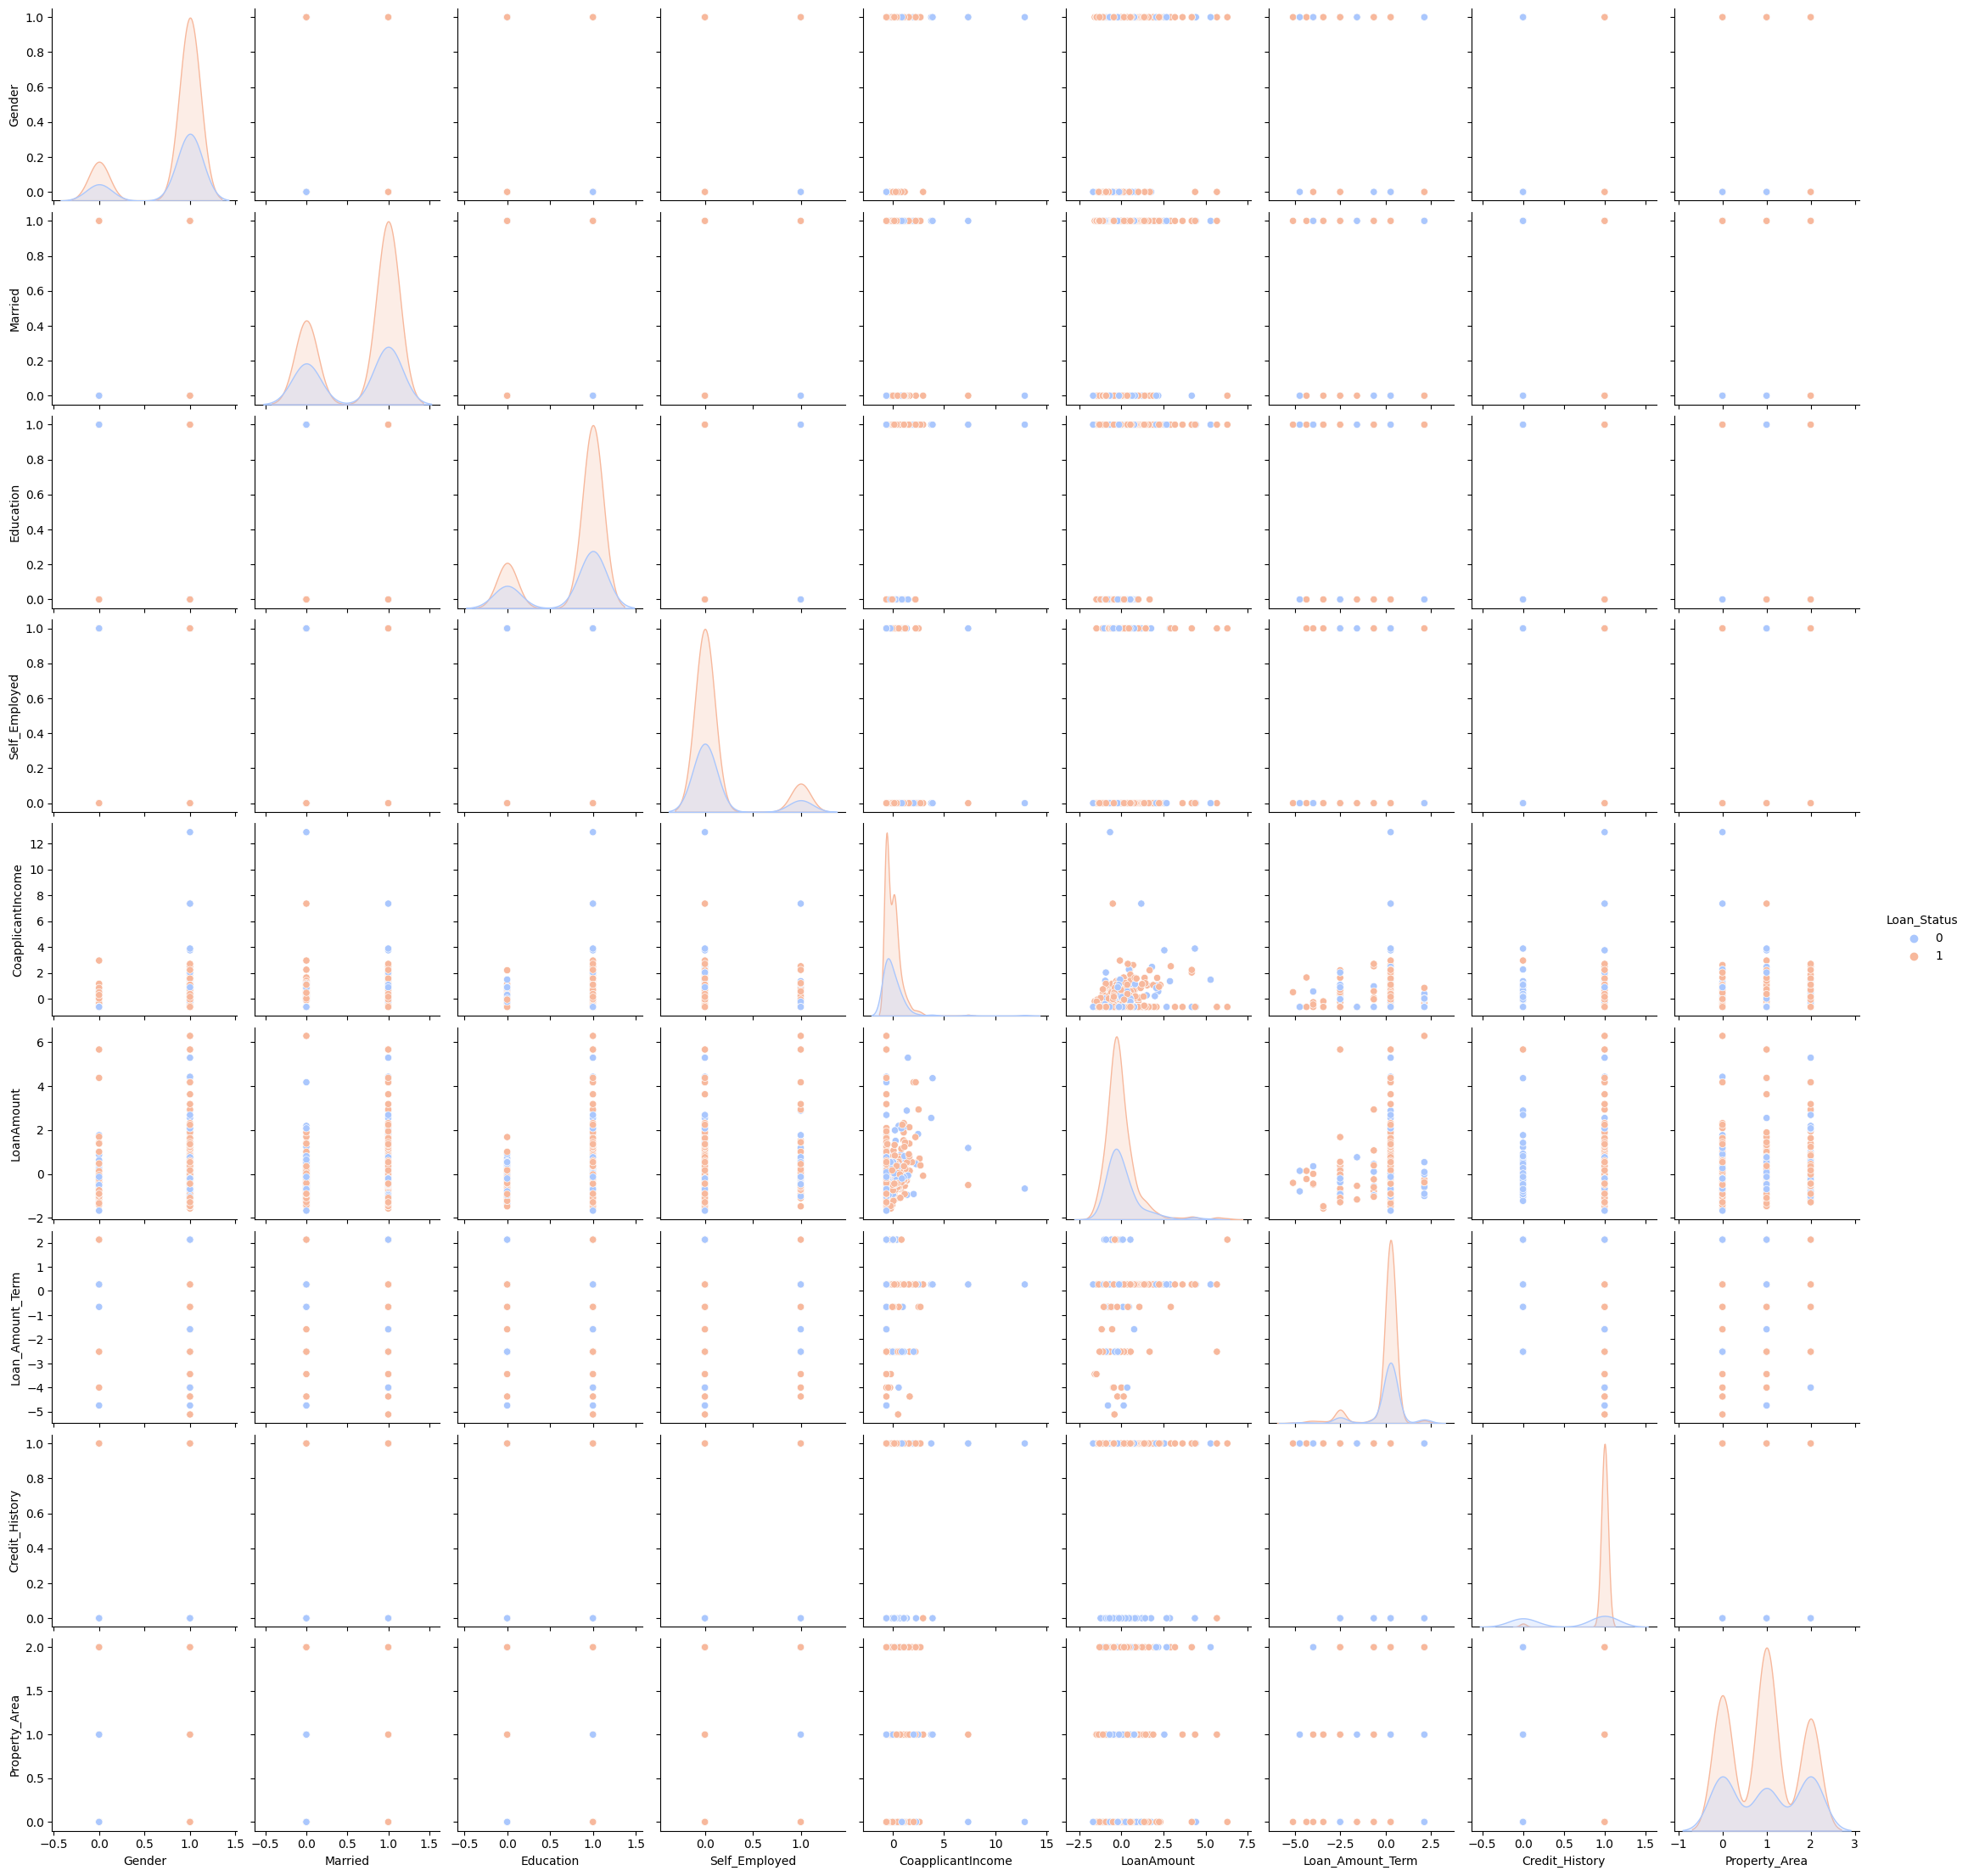

In [ ]:
sns.pairplot(data,hue='Loan_Status',palette='coolwarm')
#Compares loan_status with all other features


#APPLYING KNN

In [ ]:
#applying knn

In [ ]:
y=data['Loan_Status']

x=data.drop('Loan_Status',axis=1,inplace=False)

x_train,x_test,y_train,y_test=train(x,y,test_size=0.2,random_state=30,stratify=y)

neighbors=np.arange(1,9)

train_accuracy=np.empty(len(neighbors))

test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)

  train_accuracy[i]=knn.score(x_train,y_train)
  test_accuracy[i]=knn.score(x_test,y_test)

  

In [ ]:
predictions_KNN = knn.predict(x_test) # calculate predictions
accuracy_KNN = accuracy_score(y_test, predictions_KNN)
print(f'the model accuracy for KNN Model is: {accuracy_KNN}')

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 

## **Implementation of Logestic Model**

---



In [ ]:
#Applying logestic model
y_log =data['Loan_Status']

x_log =data.drop('Loan_Status',axis=1,inplace=False)

x_train_log,x_test_log,y_train_log,y_test_log=train(x_log,y_log,test_size=0.4,random_state=42,stratify=y_log)

model_log = LogisticRegression() #create logistic regression instance
model_log.fit(x_train_log, y_train_log)


In [ ]:
predictions_log = model_log.predict(x_test_log) # calculate predictions
accuracy_log = accuracy_score(y_test_log, predictions_log)
print(f'the model accuracy: {accuracy_log}')

#IMPLEMENATION OF SVC

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.12)

In [ ]:
model=LinearSVC()
model.fit(X_train,y_train)
train_pred=model.predict(X_train)
y_preds=model.predict(X_test)

print(f"Training score = {metrics.accuracy_score(y_train,train_pred)}")
print(f"Testing score = {metrics.accuracy_score(y_test,y_preds)}")


Since they're somehow similar then it's not overfitting or underfitting.

#Therefore after using 3 models, we can say that logestic model is most suitable one for the provided data